In [1]:
import numpy as np
import math
import os
import glob
import pandas as pd
from pylab import *
from netCDF4 import Dataset
import pylab as pl
from mpl_toolkits.basemap import Basemap,shiftgrid,cm
import matplotlib.cm as cm
from scipy.stats import f as scist

import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
% matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x = np.linspace(0,4,50)
y = func(x, 2.5, 1.3, 0.5)
yn = y + 0.2*np.random.normal(size=len(x))

popt, pcov = curve_fit(func, x, yn)

#Fitting the part. Th

In [3]:
import glob,csv
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/*.csv'))
print len(nc_filename)
print("found *.csv file: \n{}".format(nc_filename))

20
found *.csv file: 
['/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/1_ref5.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_1.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/23_4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiao

In [4]:
file_num=12
marker=['>','o','o','o','o','s','s','s','s','s','s','^']
col=['r','purple','purple','purple','purple','g','g','orange','g','purple','purple','gold']

WLS_err1=np.empty([file_num,1])
WLS_coef1=np.empty([file_num,1])
WLS_errc=np.empty([file_num,1])
WLS_coefc=np.empty([file_num,1])
sinking_rate=np.empty([file_num,1])

err1=np.empty([file_num,1])
err2=np.empty([file_num,1])

rss1=np.empty([file_num,1])
rss2=np.empty([file_num,1])

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/xiaoxiny/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


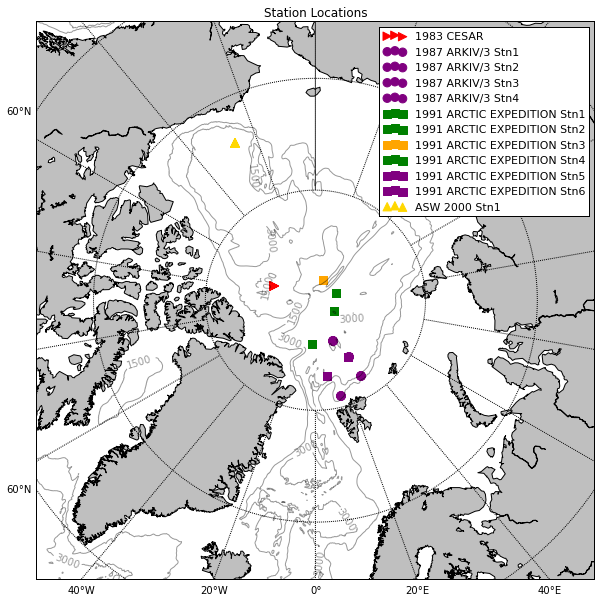

In [5]:
# map

import matplotlib.cm as cm

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

# create Basemap instance.
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    lon = data['long.'];
    name= data['name'][0];
    lat = data['lat.'];
    x,y = m(lon.values,lat.values)
    m.scatter(x,y,color=col[j],marker=marker[j],s=70,label=name)


url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)
topoin = -etopodata.variables['ROSE'][:]
topoin_ma=np.ma.masked_where(topoin<=0,topoin)
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
gridx, gridy = np.meshgrid(lons, lats)
xs,ys = m(gridx,gridy)  

m = m.contour(xs,ys,topoin_ma,linewidth=0.075,colors='black',alpha=0.4)
plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')

plt.title("Station Locations")
plt.legend(loc=1,fontsize=11)

plt.show()

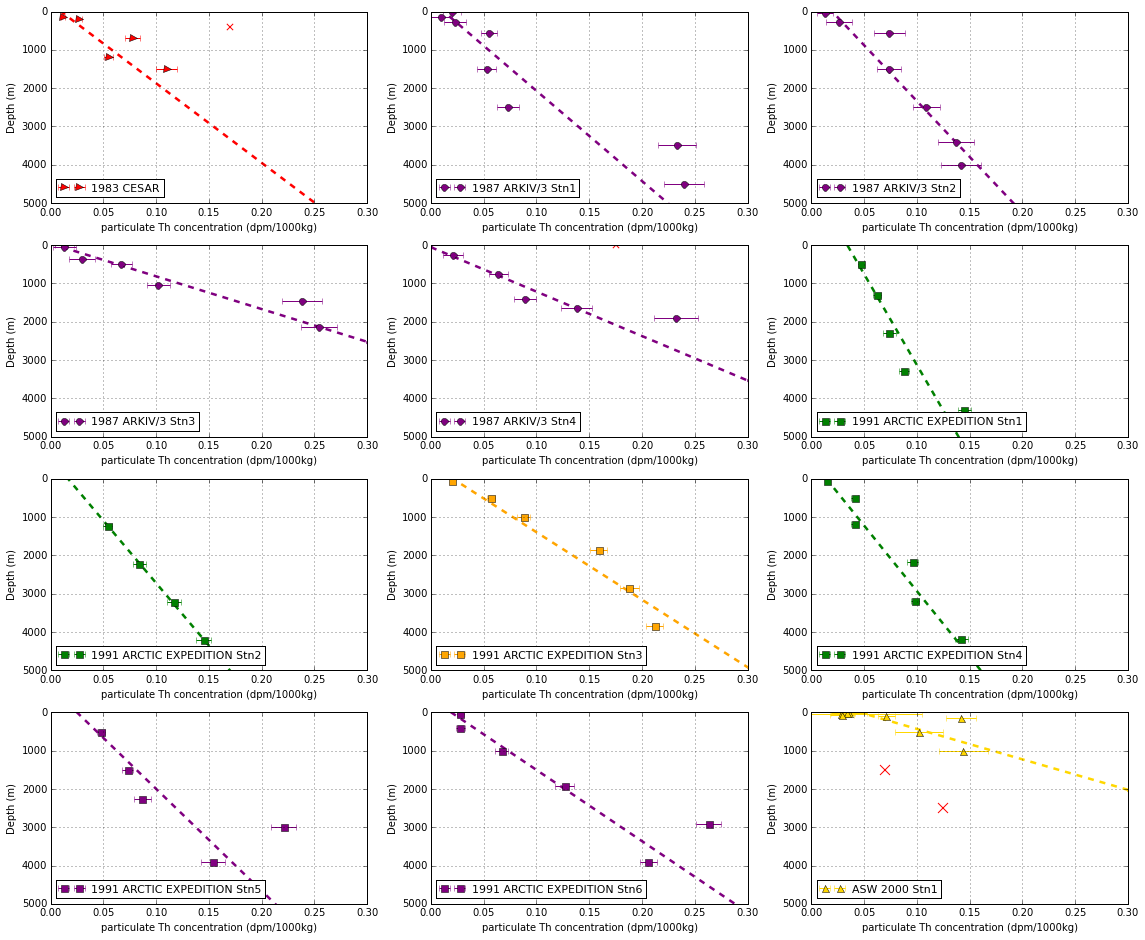

In [6]:
for j in range(file_num):

    data=pd.read_csv(nc_filename[j])

    y0= np.array(data['depth']);x0=np.array(data['230Th part.']);
    lon = data['long.'];lat = data['lat.'];name= data['name'][0];
    err0 =data['Th_part_err']
    
    x=np.ma.masked_where(x0<=0,x0); y=np.ma.masked_where(x0<=0,y0)
    err=np.ma.masked_where(x0<=0,err0)
    x=x.compressed();y=y.compressed();err=err.compressed()
    
    if j==0:
        x=np.delete(x,[2],0)
        y=np.delete(y,[2],0)
        err=np.delete(err,[2],0)
    if j==4:
        x=np.delete(x,0,0)
        y=np.delete(y,0,0)
        err=np.delete(err,0,0)
    if j==11:

        x=np.delete(x,-2,0)
        y=np.delete(y,-2,0)
        err=np.delete(err,-2,0)
        x=np.delete(x,-1,0)
        y=np.delete(y,-1,0)
        err=np.delete(err,-1,0)
    
    y2 = sm.add_constant(y,prepend=False)

    part_wls = sm.WLS(x, y2, weights=1./err**2).fit() #have intercept
    ftest   = sm.WLS(x, y, weights=1./err**2).fit()  #do not have intercept


    model1=np.sum(ftest.resid**2/err**2)
    model2=np.sum(part_wls.resid**2/err**2)
    rss1[j]=model1
    rss2[j]=model2
    
    p1 = 1
    p2 = 2
    n = len(x)
    F = ( model1 - model2)/model2*(n-p2)/(p2-p1)
    p = 1.0 - scist.cdf(F,p2-p1,n-p2)
    
    WLS_err1[j,:] = part_wls.bse[0]
    WLS_coef1[j,:] = part_wls.params[0]
    WLS_coefc[j,:]=part_wls.params[1]
    WLS_errc[j,:] = part_wls.bse[1]
    sinking_rate[j]=0.0267/part_wls.params[0]
    pre_err1=0.0267/(WLS_coef1[j,:]-WLS_err1[j,:])
    err1[j]=pre_err1-sinking_rate[j]

    
    ax = plt.figure(1,figsize=(16,16))
    ax = plt.subplot(5,3,j+1)
    cc=cm.Set1(j*23)#Spectral(j*23)
    ax.plot([0, 0.3],[0, 0.3]/part_wls.params[0]-part_wls.params[1]/part_wls.params[0],\
            '--.',c=col[j],linewidth=2.5)#,label='df2')
    ax.errorbar(x, y,xerr=err, fmt=marker[j],markersize=7,c=col[j],label=name)
    if j==0:
        ax.scatter(x0[3],y0[3],marker='x',c='r',s=40)
    if j==4:
        ax.scatter(x0[0],y0[0],marker='x',c='r',s=40)
    if j==11:
        ax.scatter(x0[-2:],y0[-2:],marker='x',c='r',s=100)
    ax.legend(loc=3,fontsize=11)
    
    ax.set_ylim([0, 5000])
    ax.set_xlim([0, 0.3])
    plt.ylabel('Depth (m)')
    plt.xlabel('particulate Th concentration (dpm/1000kg)')

    plt.gca().invert_yaxis()
    plt.grid()
    plt.tight_layout()

plt.show()

#fitting the diss. Th

####(1) Change into fit Q-C{1}K{-1}-K{-1}Qz/S

In [7]:
WLS_err2=np.empty([file_num,1]);

Kvalue=np.empty([file_num,1]); err2=np.empty([file_num,1])
Kvalue_=np.empty([file_num,1]);err2_=np.empty([file_num,1])
Jvalue_=np.empty([file_num,1]);err3_=np.empty([file_num,1])

Jvalue=np.empty([file_num,1])
WLS_coef2=np.empty([file_num,1])
Kapa=np.empty([file_num,1])

[ 0.06592102] [ 0.04251334] [ 0.11245661] [ 0.02601411]
[ 0.1654963] [ 0.09080588] [ 0.23205495] [ 0.05780263]
[ 0.13525824] [ 0.06586654] [ 0.40716898] [ 0.28380918]
[ 0.3801561] [ 0.14262473] [ 0.41683346] [ 0.08782781]
[ 0.39417757] [ 0.33027194] [ 0.35831042] [ 0.10362137]
[ 0.06824489] [ 0.02741948] [ 0.10357334] [ 0.05588316]
[ 0.09575117] [ 0.03975759] [ 0.11690332] [ 0.11054482]
[ 0.04473239] [ 0.01164806] [ 0.05341924] [ 0.01654835]
[ 0.13250355] [ 0.02980907] [ 0.17381974] [ 0.04104657]
[ 0.07427739] [ 0.0425701] [ 0.10732389] [ 0.03212563]
[ 0.1138102] [ 0.04292337] [ 0.16682279] [ 0.04329646]
[ 0.1617192] [ 0.09911029] [ 0.26085832] [ 0.07986164]


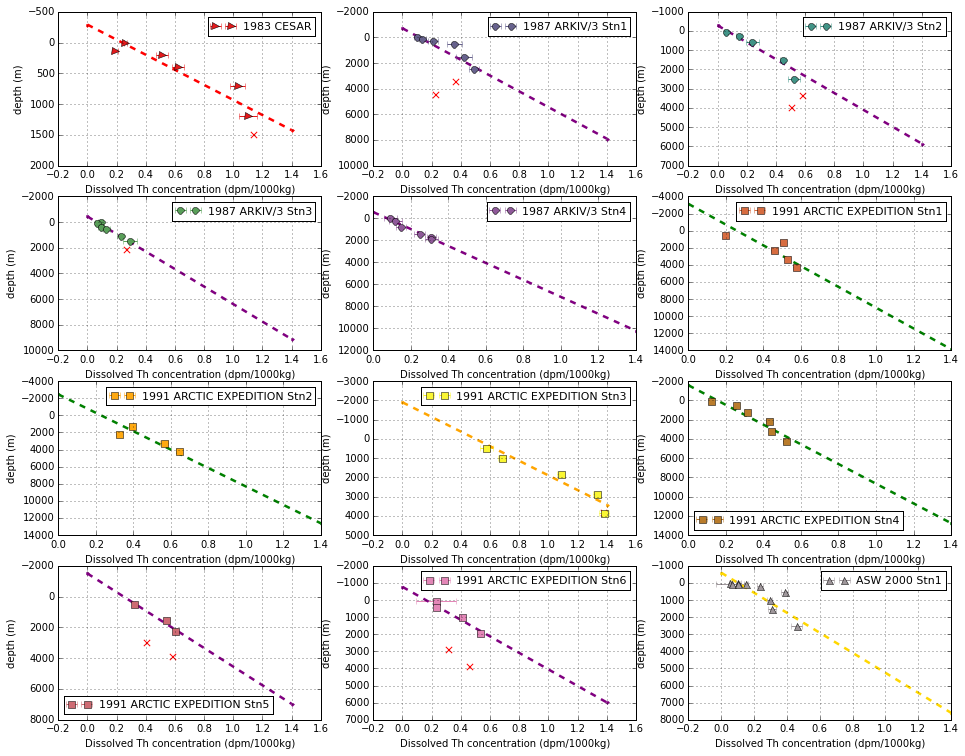

In [8]:
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    
    y0= data['depth'];
    x0= data['230Th diss.'];
    name= data['name'][0];
    lon = data['long.'];
    lat = data['lat.'];
    err0 =data['Th_diss_err']

    x=np.ma.masked_where(x0<=0,x0)
    y=np.ma.masked_where(x0<=0,y0)
    err=np.ma.masked_where(x0<=0,err0)
    
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()

    
    if j==7:
        x=np.delete(x,0,0)
        y=np.delete(y,0,0)
        err=np.delete(err,0,0)    
    if j==0 or j==3: #or j==7:
        x=np.delete(x,-1,0)
        y=np.delete(y,-1,0)
        err=np.delete(err,-1,0)
    if j==1 or j==2 or j==10 or j==9:
        index=[len(x)-2,len(x)-1]
        x=np.delete(x,index)
        y=np.delete(y,index)
        err=np.delete(err,index)
        
        
    #if j==11:

    #    x=np.delete(x,-2,0)
    #    y=np.delete(y,-2,0)
    #    err=np.delete(err,-2,0)
    #    x=np.delete(x,-1,0)
    #    y=np.delete(y,-1,0)
    #    err=np.delete(err,-1,0)
        
    y2=y
    
    #fit: model2
    y3 = sm.add_constant(y2,prepend=False)  
    diss_wls = sm.WLS(x,y3, weights=1./err**2).fit() 

    
    Q=0.0267
    a=diss_wls.params[0] #slope
    b=diss_wls.params[1] #cons.
    
    Kvalue[j] =Q**2/(b*Q+WLS_coefc[j,:]*a*sinking_rate[j])

    
    Kvalue_[j]=Q/b
    err2_[j]=Q/(b-diss_wls.bse[1])-Kvalue_[j]
    

    
    pre=Q**2/((b*Q+WLS_coefc[j,:]*a*sinking_rate[j])**2)
    pre_err2=abs(Q*pre*diss_wls.bse[1])+abs(a*WLS_coefc[j,:]*pre*err1[j])+abs(a*sinking_rate[j]*WLS_errc[j,:]*pre)
    err2[j]=pre_err2
    
    print Kvalue[j],err2[j],Kvalue_[j],err2_[j]
    
    
    Jvalue[j]=a*sinking_rate[j]/Q*Kvalue[j]
    Jvalue_[j]=a*sinking_rate[j]/Q*Kvalue_[j]

    err3=abs(Kvalue[j]*sinking_rate[j]/Q*diss_wls.bse[0])\
        +abs(a*sinking_rate[j]/Q*err2[j])+abs(a*Kvalue[j]/Q*err1[j])
        
    err3_[j]=diss_wls.bse[0]/diss_wls.params[0]*Jvalue_[j]


    
    WLS_coef2[j]=diss_wls.params[0]
    WLS_err2[j]=diss_wls.bse[0]
    #err2=diss_wls.bse[0]/diss_wls.params[0]*Kvalue[j]
    
    #fit: model1
    ftest=sm.WLS(x, y2, weights=1./err**2).fit()     
    
    #calculate weighted resid. sum
    resid1=ftest.resid**2/err**2                
    model1=np.sum(resid1)

    resid2=diss_wls.resid**2/err**2
    model2=np.sum(resid2)
    
    #prepare data to recalculate the whole profile later
    rss1[j]=model1                
    rss2[j]=model2

    #f_test
    p1 = 1
    p2 = 2
    n = len(x)
    F = (model1 - model2)/model2*(n-p2)/(p2-p1)
    p = 1.0 - scist.cdf(F,p2-p1,n-p2)

    
    #plot
    ax = plt.figure(1,figsize=(16,16))
    ax = plt.subplot(5,3,j+1)
    cc=cm.Set1(j*23)
    #ax.plot(y2, diss_wls.fittedvalues, '--.',c=cc,linewidth=1.5,label='df2')
    ax.plot([0, 1.4],[0, 1.4]/diss_wls.params[0]-diss_wls.params[1]/diss_wls.params[0], '--.',c=col[j],linewidth=2.5)
    if j==0 or j==3 or j==7 or j==1 or j==2 or j==10 or j==9:
        ax.scatter(x0[(len(x0)-1)],y0[(len(x0)-1)],marker='x',c='r',s=40)
    if j==1 or j==2 or j==10 or j==9:
        ax.scatter(x0[(len(x0)-2)],y0[(len(x0)-2)],marker='x',c='r',s=40)
    ax.errorbar(x,y2,xerr=err, fmt=marker[j],markersize=7,c=cc,label=name)

    ax.legend(loc=0,fontsize=11)

    #ax.set_xlim([0, 1.40]);ax.set_ylim([0, 5000])
    plt.xlabel('Dissolved Th concentration (dpm/1000kg)')
    plt.ylabel('depth (m)')
    plt.grid()
    plt.gca().invert_yaxis() 
plt.show()

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


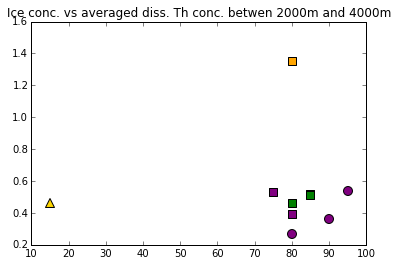

In [9]:
i= np.array([95,90,95,80,75,85,85,80,80,75,80,15]) 
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    
    y0= data['depth'];
    x0= data['230Th diss.'];
    name= data['name'][0];
    lon = data['long.'];
    lat = data['lat.'];
    err0 =data['Th_diss_err']

    x=np.ma.masked_where(x0<=0,x0)
    y=np.ma.masked_where(x0<=0,y0)
    err=np.ma.masked_where(x0<=0,err0)
    
    
    for num in range (len(y)):
        if y[num]<2000:
            x[num]=np.ma.masked
            y[num]=np.ma.masked
            err[num]=np.ma.masked
    cc=cm.Set1(j*23)        
    x=x.compressed()
    y=y.compressed()
    err=err.compressed()
    aver_x=np.average(x,axis=0)
    plt.scatter(i[j],aver_x,c=col[j],marker=marker[j],s=80)
    plt.hold(True)
    plt.title('Ice conc. vs averaged diss. Th conc. betwen 2000m and 4000m')
plt.show()

# WLS: sinking rate and the ice concentration

In [10]:
i_summer= np.array([93,93,93,84,77.3,90,89,88,88.3,82.3,81.7,31.7]) # whole summer average in two years

i= np.array([90,89,85,81,69,86,83,80,71,75,80,15])# lowest in one point


err1=(WLS_err1/WLS_coef1)*1/WLS_coef1*0.0267
#sinking_rate=numpy.append(sinking_rate,500)
#i=numpy.append(i,0)
#i_summer=numpy.append(i_summer,0)
#err1=numpy.append(err1,0.0001)

i_=np.delete(i,[1,2,3,4,9,10])
i_summer_=np.delete(i_summer,[1,2,3,4,9,10])
sinking_rate_=np.delete(sinking_rate,[1,2,3,4,9,10])
err1_=np.delete(err1,[1,2,3,4,9,10])


#i= np.array([96.4,95.2,91.2,88.8,97.2,98,98,97.6,97.6,95.6,95.2,97.2]) #poster
#marker=      ['o','o','o','o',   '^','s','s','s','s','s', 's','D','D','>']

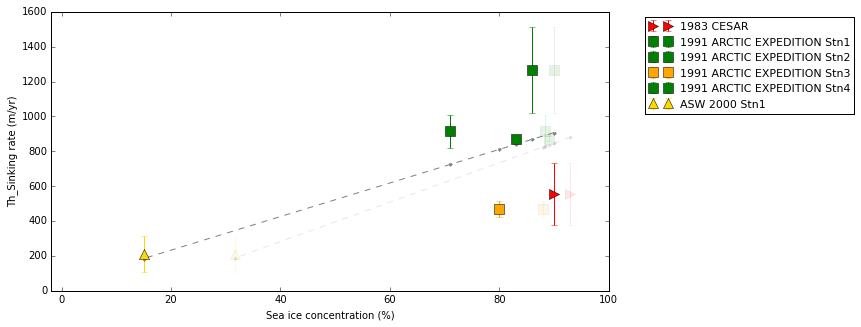

In [11]:
i2 = sm.add_constant(i_,prepend=False)
i_summer2 = sm.add_constant(i_summer_,prepend=False)

res_wls3 = sm.WLS(sinking_rate_,i2,weights=1./err1_**2).fit() 
summer = sm.WLS(sinking_rate_,i_summer2,weights=1./err1_**2).fit() 

_fig=plt.figure(figsize=(10,5));ax = _fig.add_subplot(111)
ax.plot(i_, res_wls3.fittedvalues, '--.',color='grey',alpha=1)
ax.plot(i_summer_, summer.fittedvalues, '--.',color='grey'  ,alpha=0.2)
for j in ([0,5,6,7,8,11]):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],sinking_rate[j],yerr=err1[j],fmt=marker[j],markersize=10,c=col[j],label=name)
    errorbar(i_summer[j],sinking_rate[j],yerr=err1[j],fmt=marker[j],markersize=10,c=col[j],alpha=0.1)

#ax.errorbar(i[-1],sinking_rate[-1], yerr=err1[-1], fmt='o',markersize=10,c='blue',label='previous model work')
ax.legend(loc=0, fontsize=11,bbox_to_anchor=(1.45,1))
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Th_Sinking rate (m/yr)')

ax.set_xlim([-2, 100])
plt.show()

In [12]:
print res_wls3.summary()

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.364
Model:                            WLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     2.285
Date:                Sun, 27 Mar 2016   Prob (F-statistic):              0.205
Time:                        11:19:37   Log-Likelihood:                -15.951
No. Observations:                   6   AIC:                             35.90
Df Residuals:                       4   BIC:                             35.48
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             9.6295      6.371      1.511      0.205        -8.059    27.318
const         40.6509    521.320      0.078      0.9

In [13]:
np.average(sinking_rate_)

715.3640977180338

#  K value and the ice concentration



** $x_d= \frac{1}{k}\left(Q+k_{-1} x_p \right )  = \frac{1}{k}\left(Q+k_{-1} \left(\frac{Q}{s}z +c_1\right)\right )$, where $c_1$ is the intercept from the particulate profiles.**


** The first equal sign:**

  using x_p data to fink k and k_1 will create negative values if the points that seems to be affected by advection are not removed.
  
  

** The second equal sign** (especially for the part of $\left(\frac{Q}{s}z +c_1\right)$):


### 1. Previous method: 

 The figure below shows the original fitting that keeps the variations in s and $c_1$ in different location.


**intercept = $\frac{Q+k_{-1}C_{1}}{k}$
slope     = $\frac{k_{-1}}{k}\frac{Q}{s}$**

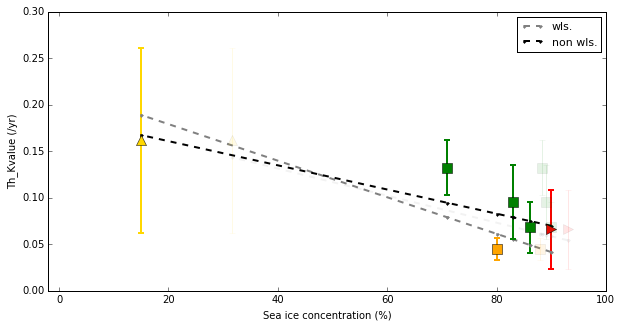

-0.00196673309675 0.218567508391
-0.00130070977597 0.18694564688


In [14]:
Kvalue__=np.delete(Kvalue,[1,2,3,4,9,10]);err2__=np.delete(err2,[1,2,3,4,9,10])

res_wls4 = sm.WLS(Kvalue__, i2, weights=1./err2__**2).fit()
non_wls  = sm.WLS(Kvalue__, i2, weights=1).fit()
summer_k = sm.WLS(Kvalue__, i_summer2, weights=1./err2__**2).fit()

_fig=plt.figure(figsize=(10,5));ax = _fig.add_subplot(111)
ax.plot(i_, res_wls4.fittedvalues,  '--.',color='grey',lw=2,alpha=1,label='wls.')
ax.plot(i_, non_wls.fittedvalues,  '--.',color='black',lw=2,alpha=1,label='non wls.')
ax.plot(i_summer_, summer_k.fittedvalues,  '--.',color='grey',lw=2,alpha=0.1)

for j in ([0,5,6,7,8,11]):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],Kvalue[j],yerr=err2[j],fmt=marker[j],markersize=10,c=col[j],\
             elinewidth=2,capthick=2,alpha=1)#,label=name)
    errorbar(i_summer[j],Kvalue[j],yerr=err2[j],fmt=marker[j],markersize=10,c=col[j],alpha=0.1)
    
ax.legend(loc=0,fontsize=11)
plt.xlabel('Sea ice concentration (%)');plt.ylabel('Th_Kvalue (/yr)');ax.set_xlim([-2, 100])
plt.show()
#print res_wls4.summary() 
s=res_wls4.params[0] #slope
c=res_wls4.params[1] #cons.
s_=non_wls.params[0] #slope
c_=non_wls.params[1] #cons.
print s,c
print s_,c_

### 2. Current method


if we let s= avg(sinking rates), then it will be meaningless to consider $c_1$. So the figure shows the fitting with averged s=715m/y and $c_1$ is set to be 0.

$x_d= \frac{1}{k}\left(Q+k_{-1} \frac{Q}{\bar{s}}z\right )$ 

**intercept = $\frac{Q}{k}$   slope = $\frac{k_1}{k}\frac{Q}{s}$ **
  

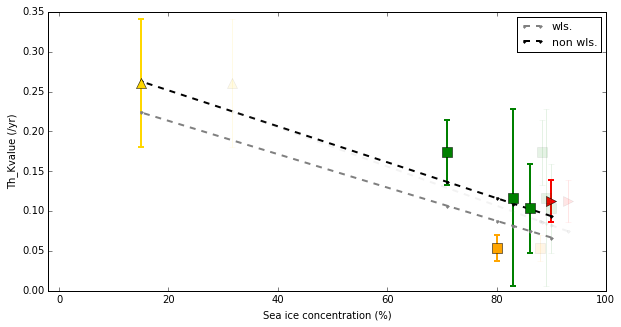

-0.00209211751975 0.255083540069
-0.00225429814635 0.296517881798


In [15]:
Kvalue__=np.delete(Kvalue_,[1,2,3,4,9,10]);err2__=np.delete(err2_,[1,2,3,4,9,10])

res_wls4 = sm.WLS(Kvalue__, i2, weights=1./err2__**2).fit()
non_wls  = sm.WLS(Kvalue__, i2, weights=1).fit()
summer_k = sm.WLS(Kvalue__, i_summer2, weights=1./err2__**2).fit()

_fig=plt.figure(figsize=(10,5));ax = _fig.add_subplot(111)
ax.plot(i_, res_wls4.fittedvalues,  '--.',color='grey',lw=2,alpha=1,label='wls.')
ax.plot(i_, non_wls.fittedvalues,  '--.',color='black',lw=2,alpha=1,label='non wls.')
ax.plot(i_summer_, summer_k.fittedvalues,  '--.',color='grey',lw=2,alpha=0.1)

for j in ([0,5,6,7,8,11]):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],Kvalue_[j],yerr=err2_[j],fmt=marker[j],markersize=10,c=col[j],\
             elinewidth=2,capthick=2,alpha=1)#,label=name)
    errorbar(i_summer[j],Kvalue_[j],yerr=err2_[j],fmt=marker[j],markersize=10,c=col[j],alpha=0.1)
    
ax.legend(loc=0,fontsize=11)
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Th_Kvalue (/yr)')
ax.set_xlim([-2, 100])
plt.show()
#print res_wls4.summary() 
s=res_wls4.params[0] #slope
c=res_wls4.params[1] #cons.
s_=non_wls.params[0] #slope
c_=non_wls.params[1] #cons.
print s,c
print s_,c_

#  J value and the ice concentration

### 1. Previous method

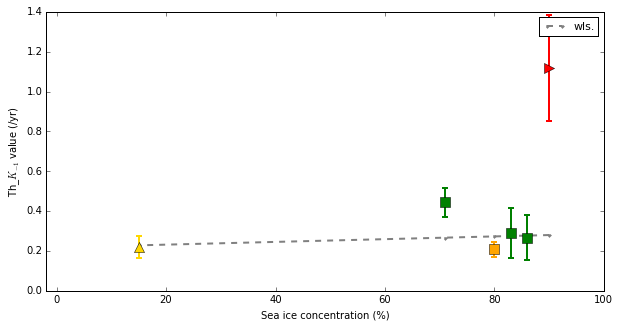

In [16]:
err2=WLS_err2/WLS_coef2*Jvalue
jvalue=np.delete(Jvalue,[1,2,3,4,9,10])
err2_=np.delete(err2,[1,2,3,4,9,10])

mod_wls4 = sm.WLS(jvalue, i2, weights=1./err2_**2).fit()

_fig=plt.figure(figsize=(10,5));ax = _fig.add_subplot(111)
ax.plot(i_, mod_wls4.fittedvalues,  '--.',color='grey',lw=2,alpha=1,label='wls.')

for j in ([0,5,6,7,8,11]):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],Jvalue[j],yerr=err2[j],fmt=marker[j],markersize=10,c=col[j],\
             elinewidth=2,capthick=2,alpha=1)#,label=name)
    
ax.legend(loc=0,fontsize=11)
plt.xlabel('Sea ice concentration (%)');plt.ylabel('Th_$K_{-1}$ value (/yr)');ax.set_xlim([-2, 100])
plt.show()

### 2. Current method

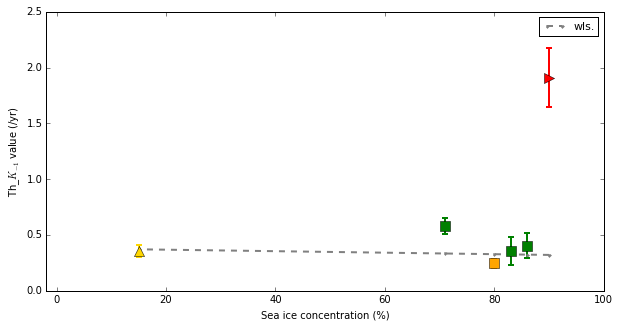

In [17]:
jvalue_=np.delete(Jvalue_,[1,2,3,4,9,10])
err3__=np.delete(err3_,[1,2,3,4,9,10])

mod_wls4 = sm.WLS(jvalue_, i2, weights=1./err3__**2).fit()


_fig=plt.figure(figsize=(10,5));ax = _fig.add_subplot(111)
ax.plot(i_, mod_wls4.fittedvalues,  '--.',color='grey',lw=2,alpha=1,label='wls.')

for j in ([0,5,6,7,8,11]):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],Jvalue_[j],yerr=err2[j],fmt=marker[j],markersize=10,c=col[j],\
             elinewidth=2,capthick=2,alpha=1)#,label=name)
    
ax.legend(loc=0,fontsize=11)
plt.xlabel('Sea ice concentration (%)');plt.ylabel('Th_$K_{-1}$ value (/yr)');ax.set_xlim([-2, 100])
plt.show()

? Should the parameterization depend on s or not?

In [18]:
from pykrige.ok import OrdinaryKriging
x_interp=np.empty(len([0,5,6,7,8,11]))
y_interp=np.empty(len([0,5,6,7,8,11]))

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/*.csv'))
i=0
for j in ([0,5,6,7,8,11]):
    
    data=pd.read_csv(nc_filename[j])
    lon = data['long.'];
    name= data['name'][0];
    lat = data['lat.'];
    m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
    x,y = m(lon.values,lat.values)
    x_interp[i]=x[0]
    y_interp[i]=y[0]
    i=i+1

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'linear' Variogram Model
Slope: -4.46853254619e-23
Nugget: 0.434062614017 



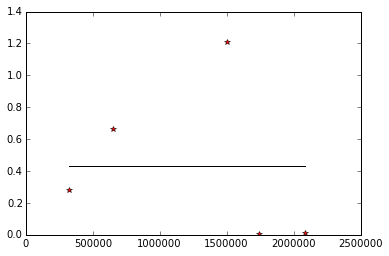

Calculating statistics on variogram model fit...
Q1 = 1.03335831182
Q2 = 1.14526086522
cR = 0.711356087273 

Updating variogram mode...
Using 'linear' Variogram Model
Slope: 1.93903308621e-07
Nugget: 2.23791257723e-07 



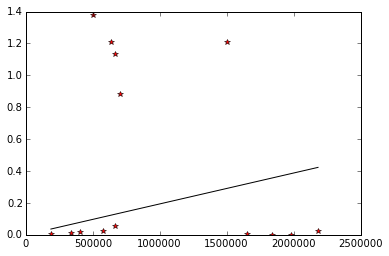

Calculating statistics on variogram model fit...
Q1 = 2.11398641557
Q2 = 4.28427686522
cR = 0.635743026049 

Executing Ordinary Kriging...



In [19]:
import netCDF4 as nc
OK = OrdinaryKriging(x_interp,y_interp,jvalue_, variogram_model='linear', verbose=True, enable_plotting=True)
OK.update_variogram_model('linear',nlags=100,anisotropy_angle=0)
coordinate_name=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/*coor*.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
x_lon,y_lat = m(nav_lon, nav_lat)

J_interp, ss = OK.execute('points',x_lon, y_lat)
J_interp=J_interp.reshape(nav_lon.shape)

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


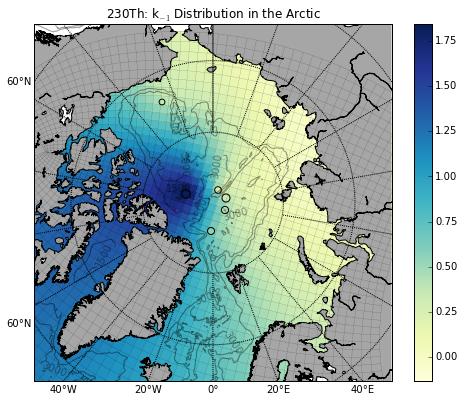

In [20]:
fig=plt.figure(figsize=(8, 8)); 
ax = fig.add_subplot()

# create Basemap instance.
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.65')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])


CS = m.pcolor(x_lon[::10,::10],y_lat[::10,::10],J_interp[::10,::10],cmap=plt.cm.YlGnBu)#boundary+120
CBar = plt.colorbar(CS, shrink=0.8)
cmm = plt.cm.get_cmap('YlGnBu')
for j in range(len(y_interp)):    
    plt.scatter(x_interp[j],y_interp[j],c=jvalue_[j],vmin=np.min(J_interp),vmax=np.max(J_interp),cmap=cmm,s=Jvalue[j]*50+20)
    
    
plt.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon[::10,::10].T,y_lat[::10,::10].T,color='black',linewidth=0.1)


url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)
topoin = -etopodata.variables['ROSE'][:]
topoin_ma=np.ma.masked_where(topoin<=0,topoin)
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
gridx, gridy = np.meshgrid(lons, lats)
xs,ys = m(gridx,gridy)  

m = m.contour(xs,ys,topoin_ma,linewidth=0.075,colors='black',alpha=0.4)
plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')

plt.title('230Th: k$_{-1}$ Distribution in the Arctic')
plt.legend(loc=1,fontsize=11)

plt.show()

In [21]:
lat = nav_lat
lon = nav_lon
print lat.shape
xmax = lat.shape[1]
ymax = lat.shape[0]


nemo = nc.Dataset('/ocean/xiaoxiny/research/data/findk/newdata_desorption_rate.nc', 'w')
nemo.description = 'desorption rate' 

# dimensions
nemo.createDimension('x', xmax)
nemo.createDimension('y', ymax)
nemo.createDimension('time_counter', None)

# variables
# latitude and longitude
nav_lat = nemo.createVariable('nav_lat','float32',('y','x'),zlib=True)
nav_lat = lat
x = nemo.createVariable('nav_lon','float32',('y','x'),zlib=True)
nav_lon = lon
# time
time_counter = nemo.createVariable('time_counter', 'float32', ('time_counter'),zlib=True)
time_counter.units = 'non-dim'
time_counter[0] = 1
# runoff
Pa = nemo.createVariable('desorption_rate', 'float32', ('time_counter','y','x'), zlib=True)
Pa._units = 'arbitrary'
Pa[0,:,:]=J_interp[:,:]
nemo.close()

(800, 544)
